In [3]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

def design_fir_integer_coeffs(n_taps, cutoff_freq, fs, bit_width=16, filter_type='lowpass', window='hamming'):
    """
    Design FIR filter and generate signed integer coefficients
    
    Parameters:
    n_taps: Filter order (number of taps)
    cutoff_freq: Cutoff frequency (Hz), for bandpass/bandstop filters, pass [low_cutoff, high_cutoff]
    fs: Sampling frequency (Hz)
    bit_width: Coefficient bit width (including sign bit)
    filter_type: Filter type, 'lowpass', 'highpass', 'bandpass', 'bandstop'
    window: Window function type, such as 'hamming', 'hanning', 'blackman'
    
    Returns:
    Filter coefficients in signed integer form
    """
    # Calculate normalized cutoff frequency
    nyq = 0.5 * fs  # Nyquist frequency
    
    if isinstance(cutoff_freq, list):
        # Bandpass or bandstop filter
        cutoff_norm = [f / nyq for f in cutoff_freq]
    else:
        # Lowpass or highpass filter
        cutoff_norm = cutoff_freq / nyq
    
    # Design floating-point coefficient filter
    coeffs_float = signal.firwin(n_taps, cutoff_norm, window=window, pass_zero=filter_type)
    
    # Convert coefficients to signed integers
    max_val = 2**(bit_width-1) - 1  # Maximum value for signed integers
    scaling_factor = max_val / np.max(np.abs(coeffs_float))
    coeffs_int = np.round(coeffs_float * scaling_factor).astype(np.int32)
    
    # Ensure coefficients are within valid range
    coeffs_int = np.clip(coeffs_int, -max_val-1, max_val)
    
    return coeffs_int


Filter coefficients: [ -177  -736 -1687 -1463  2781 12306 24297 32767 32767 24297 12306  2781
 -1463 -1687  -736  -177]
Number of coefficients: 16


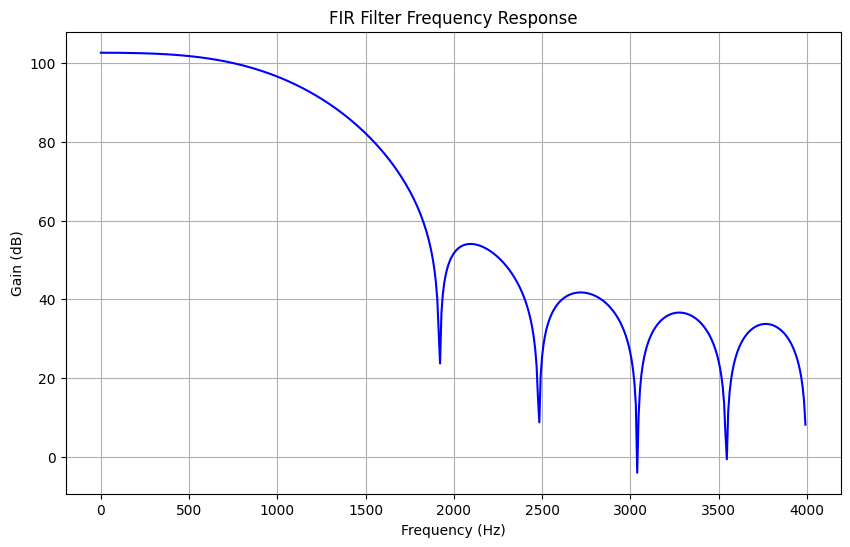

In [4]:
# Example: Design a low-pass filter
n_taps = 16  
cutoff_freq = 1000  
fs = 8000  # Sampling rate 8kHz

coeffs = design_fir_integer_coeffs(n_taps, cutoff_freq, fs, window='hamming', filter_type='lowpass')
print(f"Filter coefficients: {coeffs}")
print(f"Number of coefficients: {len(coeffs)}")

# Plot frequency response
w, h = signal.freqz(coeffs)
plt.figure(figsize=(10, 6))
plt.plot(0.5*fs*w/np.pi, 20*np.log10(np.abs(h)), 'b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain (dB)')
plt.title('FIR Filter Frequency Response')
plt.grid(True)
plt.show()

Filter coefficients: [  -641   -309   4465  -9350   2814  18506 -32767  16897  16897 -32767
  18506   2814  -9350   4465   -309   -641]
Number of coefficients: 16


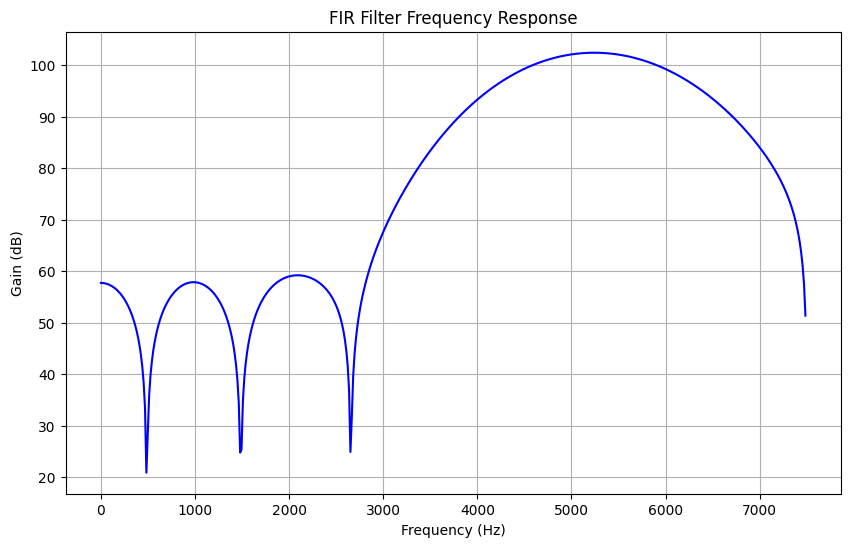

In [5]:
# Example: Design a bandpass filter
n_taps = 16  
cutoff_freq = [4500, 6000] # <= fs/2
fs = 15000  # Sampling rate

coeffs = design_fir_integer_coeffs(n_taps, cutoff_freq, fs, window='hamming', filter_type='bandpass')
print(f"Filter coefficients: {coeffs}")
print(f"Number of coefficients: {len(coeffs)}")

# Plot frequency response
w, h = signal.freqz(coeffs)
plt.figure(figsize=(10, 6))
plt.plot(0.5*fs*w/np.pi, 20*np.log10(np.abs(h)), 'b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain (dB)')
plt.title('FIR Filter Frequency Response')
plt.grid(True)
plt.show()

Filter coefficients: [    0   271   -38     0    76  -996     0 -1722 -1247     0 -2810  3613
     0  4529 11046     0 25771 -5625 32767 -5625 25771     0 11046  4529
     0  3613 -2810     0 -1247 -1722     0  -996    76     0   -38   271
     0]
Number of coefficients: 37


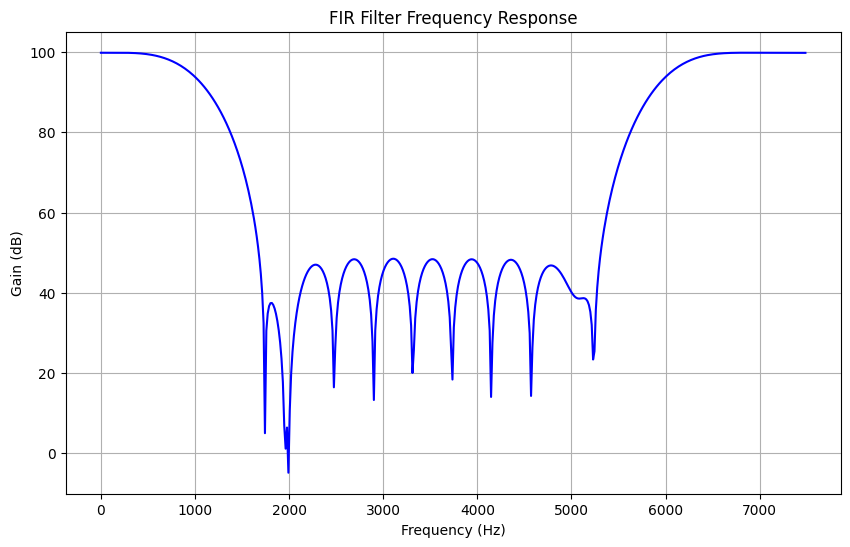

In [6]:
# Example: Design a bandstop filter
n_taps = 37  
cutoff_freq = [1000, 6000]  
fs = 15000  # Sampling rate

coeffs = design_fir_integer_coeffs(n_taps, cutoff_freq, fs, window='hamming', filter_type='bandstop')
print(f"Filter coefficients: {coeffs}")
print(f"Number of coefficients: {len(coeffs)}")

# Plot frequency response
w, h = signal.freqz(coeffs)
plt.figure(figsize=(10, 6))
plt.plot(0.5*fs*w/np.pi, 20*np.log10(np.abs(h)), 'b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain (dB)')
plt.title('FIR Filter Frequency Response')
plt.grid(True)
plt.show()